In [40]:
# 폰트 문제 해결하기
import platform
import matplotlib.pyplot as plt

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [41]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns

%matplotlib inline

In [42]:
price = pd.read_csv("Apartment price.csv", encoding="euc-kr",header=10)
#단위 1,000단위, #2017년 12월을 기준으로 설정

In [43]:
#나중에 '구별' merge 함수 이용하기 위해 엑셀 value가 구별이 아닌 것은 전부 구별로 수정
price.rename(columns={price.columns[0]: '구별'}, inplace=True)

In [44]:
price2 =price.loc[:,['구별','2017년 12월']]

In [45]:
price2.set_index("구별", inplace=True)

In [69]:
divorce = pd.read_csv("divorce.csv", encoding="euc-kr")

In [70]:
divorce.head()

,구별,2013결혼,2013이혼,2014결혼,2014이혼,2015결혼,2016이혼,2016결혼,2016이혼.1,2017결혼,2017이혼
0,서울평균,"2,753",805,"2,593",779,"2,618",727,"2,306",711,"2,151",683
1,종로구,877,348,840,341,806,276,760,260,700,265
2,중구,860,320,851,288,916,267,799,249,792,253
3,용산구,"1,795",450,"1,560",471,"1,515",424,"1,366",441,"1,357",389
4,성동구,"2,432",613,"2,125",596,"2,083",563,"1,944",547,"2,096",509


In [83]:
divorce2 =divorce.loc[:,['구별','2017결혼','2017이혼']]
divorce2.sort_values(by="2017이혼", ascending=False)

,구별,2017결혼,2017이혼
7,중랑구,"2,302",956
12,은평구,"2,331",917
21,관악구,"3,205",817
23,강남구,"2,677",805
25,강동구,"2,427",784
17,구로구,"2,460",775
9,강북구,"1,436",742
8,성북구,"1,917",732
15,양천구,"2,021",700
0,서울평균,"2,151",683


In [82]:
data_result = pd.merge(price, divorce, on='구별')
data_result2 = data_result.loc[:,['구별','2017년 12월','2017결혼','2017이혼']]
data_result2.head()

,구별,2017년 12월,2017결혼,2017이혼
0,종로구,537500,700,265
1,중구,600000,792,253
2,용산구,885000,"1,357",389
3,성동구,622500,"2,096",509
4,광진구,700000,"2,082",612


In [58]:
# 그래프 그리기를 위한 set_index => 구별을 중심
data_result.set_index("구별", inplace=True)

In [81]:
np.corrcoef(data_result['2017년 12월'],data_result['2017이혼'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

 - 만족스러운 결과를 얻지 못했다. 서울은 구별 인구차이가 꽤 많이나기때문에 1,000 명당 이혼자, 결혼자로 계산을 바꿔야
    구별 아파트 가격차이별 이혼자, 결혼자 데이터값을 구할 수 있을 것으로 보인다.

In [88]:
pop = pd.read_csv("population.csv", encoding="euc-kr")
#2017년 12월을 기준으로 설정

In [89]:
pop.head()

,구별,2017년 12월인구
0,종로구,"73,594"
1,중구,"60,412"
2,용산구,"107,666"
3,성동구,"132,902"
4,광진구,"160,798"


In [90]:
data_result3 = pd.merge(pop, divorce,on='구별')

In [95]:
data_result3

,구별,2017년 12월인구,2013결혼,2013이혼,2014결혼,2014이혼,2015결혼,2016이혼,2016결혼,2016이혼.1,2017결혼,2017이혼
0,종로구,"73,594",877,348,840,341,806,276,760,260,700,265
1,중구,"60,412",860,320,851,288,916,267,799,249,792,253
2,용산구,"107,666","1,795",450,"1,560",471,"1,515",424,"1,366",441,"1,357",389
3,성동구,"132,902","2,432",613,"2,125",596,"2,083",563,"1,944",547,"2,096",509
4,광진구,"160,798","2,685",743,"2,589",713,"2,576",651,"2,285",649,"2,082",612
5,동대문구,"159,938","2,327",740,"2,123",770,"2,159",714,"1,796",666,"1,657",624
6,중랑구,"179,132","2,813","1,040","2,769","1,105","2,716","1,028","2,591",933,"2,302",956
7,성북구,"187,112","2,809",934,"2,415",907,"2,379",823,"2,131",833,"1,917",732
8,강북구,"142,533","1,975",848,"1,819",831,"1,715",738,"1,500",722,"1,436",742
9,도봉구,"137,378","2,062",801,"1,791",777,"1,810",728,"1,636",670,"1,543",666


In [97]:
data_rusult3['2017 1000명당 이혼']= data_result3['2017이혼'] / data_result3['2017년 12월인구']*1000

TypeError: unsupported operand type(s) for /: 'str' and 'str'

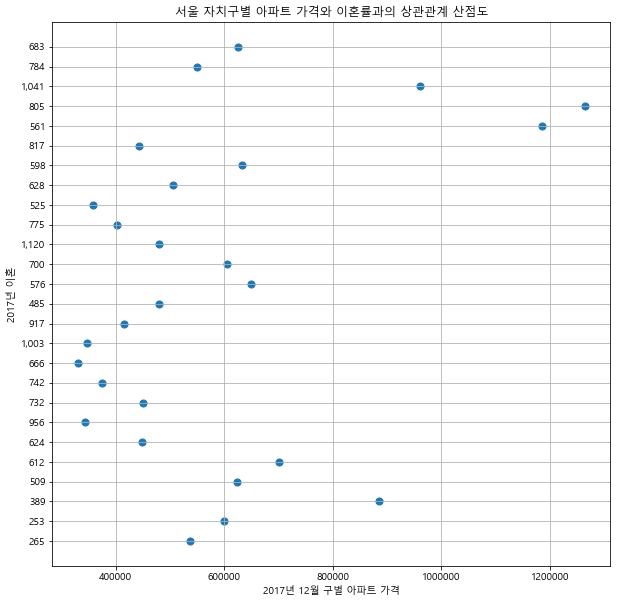

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(data_result2['2017년 12월'], data_result2['2017이혼'], s=50)
plt.xlabel('2017년 12월 구별 아파트 가격')
plt.ylabel('2017년 이혼')
plt.title("서울 자치구별 아파트 가격와 이혼률과의 상관관계 산점도")
plt.grid()
plt.show()